In [1]:
import shap
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay
import os
os.environ['QT_QPA_PLATFORM']='offscreen'



Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
from churn_library_v15 import import_data, plot_univar_quant, plot_bivariate, separate_columns, plot_corr_matrix, encode_categorical_columns, print_scores, plot_roc_curves, plot_feature_importances, choose_predictors, train_fit_models

In [3]:
if __name__ == "__main__":
    # Load the dataset using the import_data function
    data_path = "./data/bank_data.csv"
    df = import_data(data_path)
    
    # Use the separate_columns function
    cat_columns, quant_columns = separate_columns()
    
    # Print the separated column lists
    print("Categorical Columns:", cat_columns)
    print("Quantitative Columns:", quant_columns)

Categorical Columns: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Quantitative Columns: ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [4]:
# # Sanity checks #1
df.shape
# df.describe()
# df.isnull().sum()

(10127, 23)

In [5]:
# Prepare churn from attrition
df['Churn'] = df['Attrition_Flag'].apply(lambda val: 0 if val == "Existing Customer" else 1)

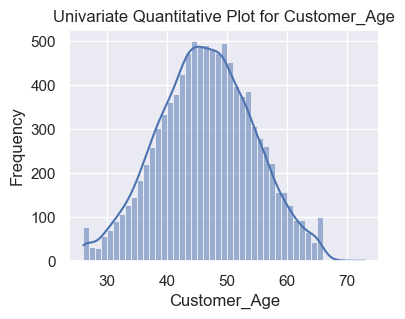

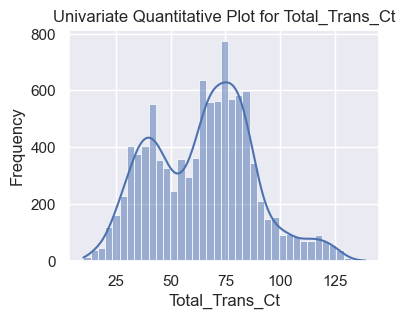

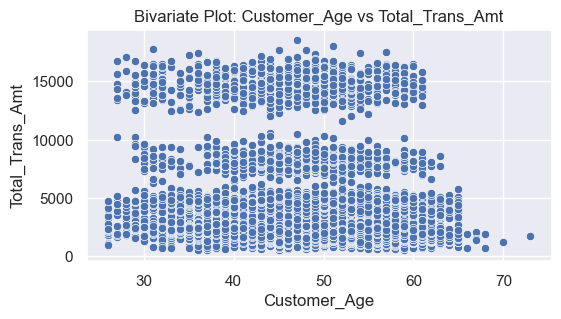

In [6]:
plot_univar_quant(df,'Customer_Age')
plot_univar_quant(df,'Total_Trans_Ct')
plot_bivariate(df, 'Customer_Age', 'Total_Trans_Amt')

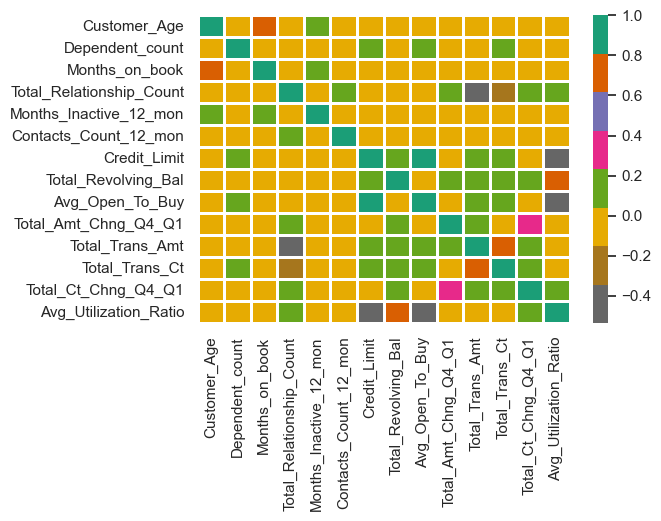

In [7]:
# Corr_Matrix: Select quantitative columns from the DataFrame
quant_df = df[quant_columns]
plot_corr_matrix(quant_df, save_filename='correlation_matrix.png')

In [8]:
# get labels y
y = df['Churn']

In [9]:
# prepare empty pd fram for predictors
X = pd.DataFrame()

In [10]:
# X_enc is a bkup copy of df
X_enc = encode_categorical_columns(df, cat_columns)

In [11]:
X_enc.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
       'Churn', 'Gender_Churn', 'Education_Level_Churn',
       'Marital_Status_Churn', 'Income_Category_Churn', 'Card_Category_Churn',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_

In [12]:
X = choose_predictors(df)
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_Churn,Education_Level_Churn,Marital_Status_Churn,Income_Category_Churn,Card_Category_Churn
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.146152,0.152012,0.151269,0.134807,0.160979
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.173572,0.155691,0.169414,0.171862,0.160979
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.146152,0.155691,0.151269,0.157655,0.160979
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.173572,0.152012,0.172230,0.171862,0.160979
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.146152,0.159381,0.151269,0.134807,0.160979


In [13]:
# Train and Fit ML models  
cv_rfc, lrc, X_train, X_test, y_train, y_test, y_train_preds_rf, y_test_preds_rf, y_train_preds_lr, y_test_preds_lr = train_fit_models(X, y)

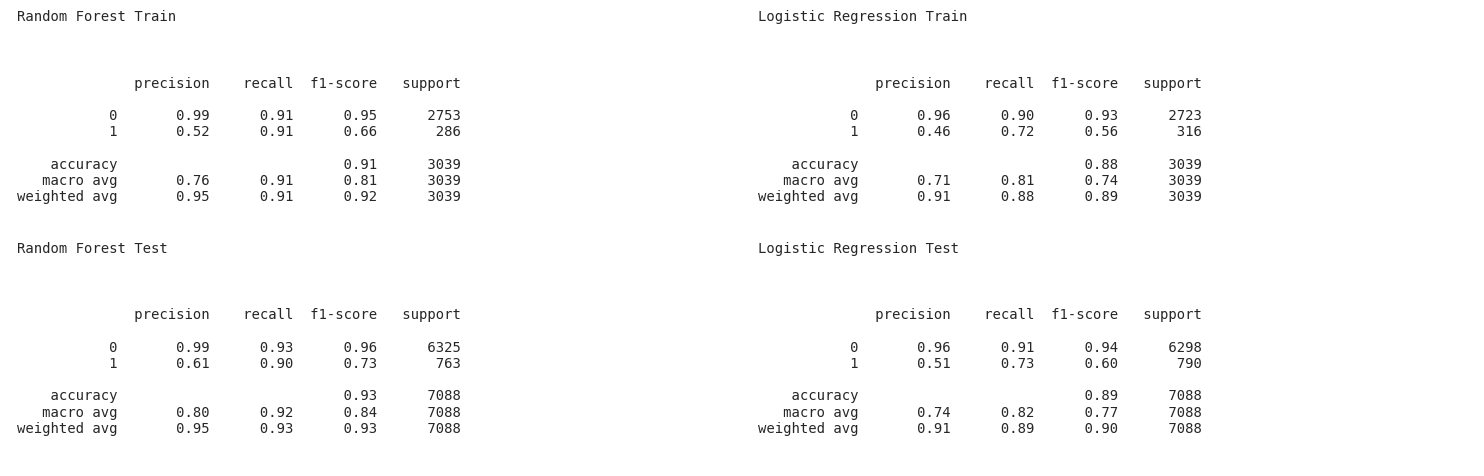

In [14]:
print_scores(cv_rfc.best_estimator_, lrc, y_train, y_test, y_train_preds_rf, y_test_preds_rf, y_train_preds_lr, y_test_preds_lr)

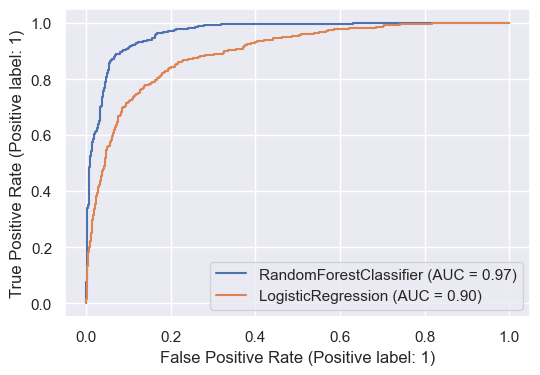

In [15]:
plot_roc_curves(cv_rfc.best_estimator_, lrc, X_test, y_test)  # cv_rfc.best_estimator_ or any RFC model

In [16]:
# Store best models in pkl files  => def f()
joblib.dump(cv_rfc.best_estimator_, './models/rfc_model.pkl')
joblib.dump(lrc, './models/logistic_model.pkl')

['./models/logistic_model.pkl']

In [17]:
# Reload best models from pkl files  => def f()
rfc_model = joblib.load('./models/rfc_model.pkl')
lr_model = joblib.load('./models/logistic_model.pkl')

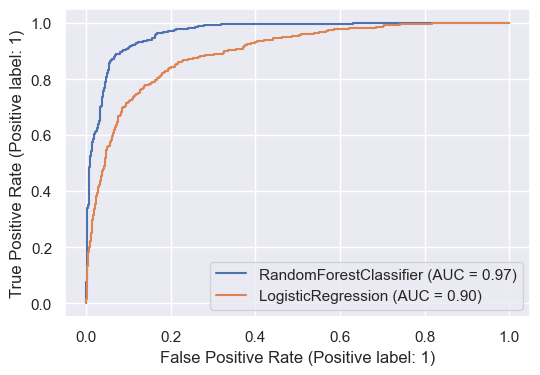

In [18]:
# test the AU-ROCs of stored model vs. the prior best fit 
plot_roc_curves(rfc_model, lr_model, X_test, y_test)

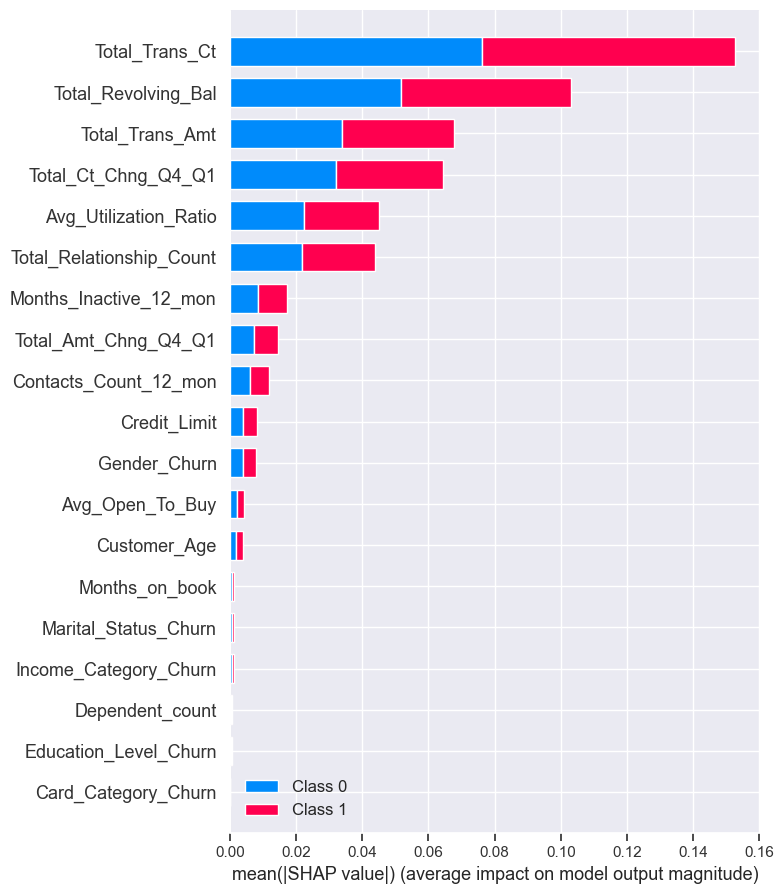

In [19]:
# Explain features via SHAP vals
explainer = shap.TreeExplainer(cv_rfc.best_estimator_)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

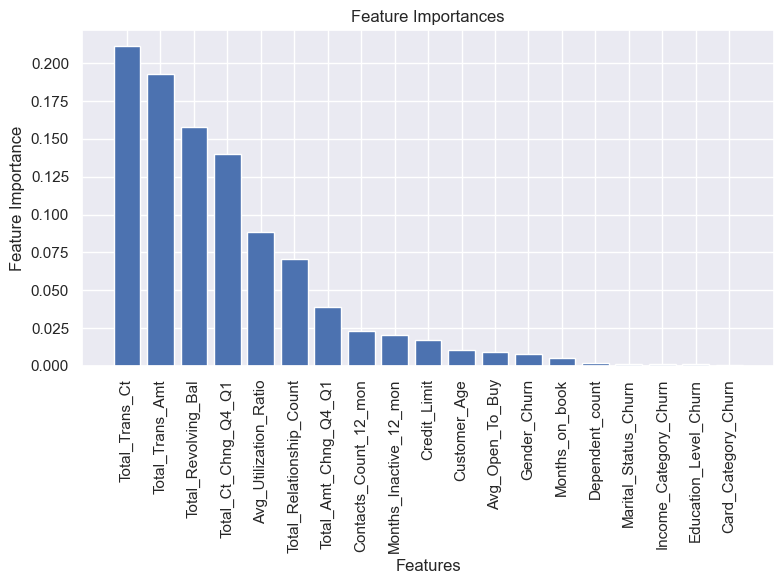

In [20]:
# Rank feature importances 
plot_feature_importances(cv_rfc.best_estimator_, X_train)